In [1]:
import pandas as pd

Reading the dataset

In [2]:
df = pd.read_excel('Raisin_Dataset.xlsx')

In [3]:
df.head() #showing the data of 5 entries

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [4]:
df.dtypes #finding the data type of datas

Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
Extent             float64
Perimeter          float64
Class               object
dtype: object

In [5]:
df.size #Return an int representing the number of elements in this object.

7200

In [6]:
df.shape #Return a tuple representing the dimensionality of the DataFrame.

(900, 8)

In [8]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [9]:
df.isnull().sum()# checking null values

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [12]:
df.drop_duplicates(inplace = True)#Return DataFrame with duplicate rows removed.
print(df.shape)

(900, 8)


In [13]:
df.describe()#Generate descriptive statistics.

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


# PLotting Pie Chart

In [91]:
new_df = df['Class'].value_counts().rename_axis('sub_cat_values').reset_index(name='counts')
new_df.head(2)

,sub_cat_values,counts
0,Kecimen,450
1,Besni,450


In [94]:
# Get Some of Values in Counts column of new df as we require this to get values
total_of_counts = new_df.counts.sum()
total_of_counts

900

In [96]:
# To Add the Values along With Percentage we have to do reverse calculation using a function
def your_autopct_format(prct_value):
    print(prct_value)
    return '{:.1f}%\n{:.0f}'.format(prct_value, total_of_counts*prct_value/100)

In [104]:
#set labels and values
your_labels = new_df.sub_cat_values
your_values = new_df.counts
your_explode = [0.05, 0] # you can create this input from datafram or list

50.0
50.0


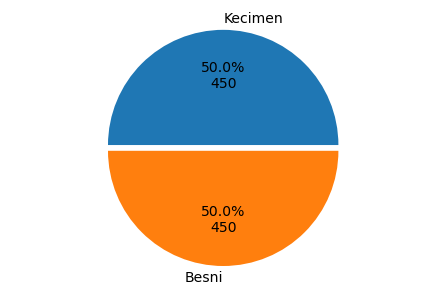

In [105]:
#visualize the pie chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(your_values, labels = your_labels, autopct=your_autopct_format, explode=your_explode,textprops={'fontsize': 14})
plt.show()

In [14]:
X = df.drop(columns = 'Class') # X contains the features 
y= df['Class']
print(X.shape)
X.head()

(900, 7)


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251


In [15]:
X.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [16]:
scale_vars = []

for cols in X.columns:
    if X[cols].max() > 1:
        scale_vars.append(cols)
scale_vars

['Area', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'Perimeter']

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
print(X_train.shape)
print(X_test.shape)

(720, 7)
(180, 7)


In [18]:
scaler.fit(X_train[scale_vars])
X_train[scale_vars] = scaler.transform(X_train[scale_vars])
X_test[scale_vars] = scaler.transform(X_test[scale_vars])

In [19]:
X_test.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
780,0.212517,0.246550,0.216529,0.850824,0.180369,0.725455,0.201294
893,0.771038,0.562809,0.627156,0.836205,0.645775,0.713947,0.497124
574,0.800667,0.704068,0.510594,0.908407,0.678034,0.605916,0.587676
200,0.175575,0.139679,0.285530,0.687258,0.145499,0.735317,0.132103
575,0.573016,0.474825,0.502946,0.842907,0.482949,0.632833,0.421139


In [20]:
X_train.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
652,0.343789,0.338860,0.338570,0.844165,0.293939,0.679432,0.287406
874,0.359673,0.313474,0.390465,0.802212,0.299940,0.785178,0.274901
532,0.265462,0.278574,0.295782,0.829402,0.233572,0.630243,0.269123
848,0.347965,0.254005,0.454719,0.699481,0.293798,0.720765,0.253863
805,0.140944,0.222739,0.112270,0.888703,0.119879,0.656366,0.163115


# Feature Selection Techniques

1) Zero Variance

2) Pearson's Correlation Coefficient

In [21]:
featuresWithZeroVariance = []
for cols in X_train.columns:
    unique_vals = X_train[cols].unique()
    if len(unique_vals) == 1:
        featuresWithZeroVariance.append(cols)
featuresWithZeroVariance

[]

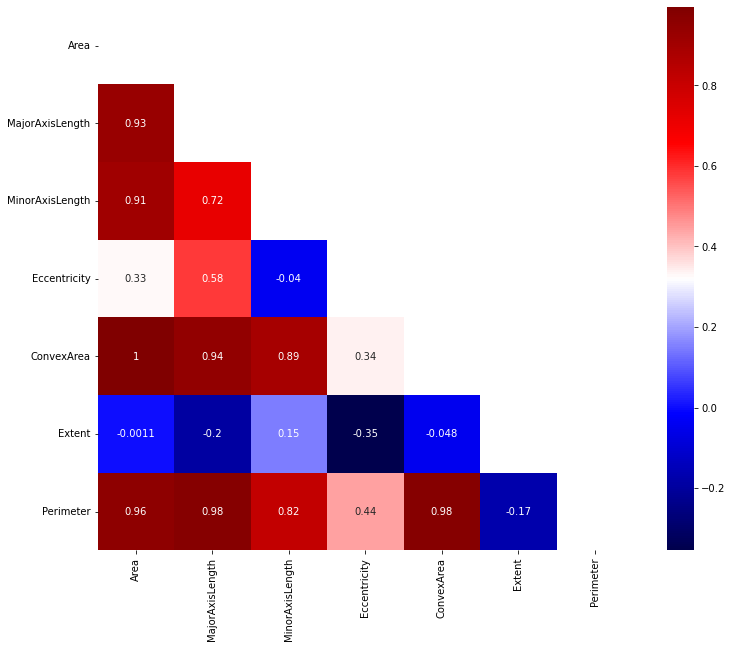

In [22]:
# Pearson's Correlation Coefficient

corr = X_train.corr()
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1);

In [23]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [24]:
corr_features = correlation(X_train, 0.9) # 85% is a good value of the threshold
print(len(corr_features))
print(corr_features)

4
{'MajorAxisLength', 'Perimeter', 'MinorAxisLength', 'ConvexArea'}


In [25]:
X_train = X_train.drop(columns = corr_features)
X_test = X_test.drop(columns = corr_features)

print(X_train.shape)
print(X_test.shape)

(720, 3)
(180, 3)


# Models

Finding Decision Tree Optimal Max Depth

Depth =  2 , Training Accuracy =  0.8472222222222222 , Test Accuracy =  0.8222222222222222 , Diff =  2.500000000000002  %
Depth =  3 , Training Accuracy =  0.8666666666666667 , Test Accuracy =  0.8277777777777777 , Diff =  3.8888888888888973  %
Depth =  4 , Training Accuracy =  0.8736111111111111 , Test Accuracy =  0.8277777777777777 , Diff =  4.583333333333339  %
Depth =  5 , Training Accuracy =  0.8944444444444445 , Test Accuracy =  0.8277777777777777 , Diff =  6.666666666666677  %
Depth =  6 , Training Accuracy =  0.9180555555555555 , Test Accuracy =  0.8277777777777777 , Diff =  9.027777777777779  %
Depth =  7 , Training Accuracy =  0.9291666666666667 , Test Accuracy =  0.8111111111111111 , Diff =  11.805555555555557  %
Depth =  8 , Training Accuracy =  0.9458333333333333 , Test Accuracy =  0.8055555555555556 , Diff =  14.027777777777771  %
Depth =  9 , Training Accuracy =  0.9597222222222223 , Test Accuracy =  0.8055555555555556 , Diff =  15.416666666666668  %
Depth =  10 , Traini

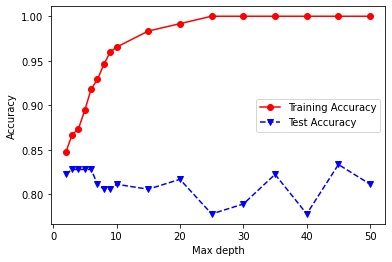

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]# trees of different max depth
trainAcc = np.zeros(len(maxdepths))# makes a list of array of same size as max depth
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:# 2 then 3 then .....
    clf = DecisionTreeClassifier(max_depth=depth)# 2 then 3....
    clf = clf.fit(X_train, y_train)# clf=decision tree classifier
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

Plotting the Decision Tree

In [28]:
from sklearn import tree
from sklearn.tree import export_graphviz
!pip install graphviz

In [32]:
import graphviz
dot_data = tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=X_train.columns,    
    class_names=df['Class'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data)
#graph
#Go to https://dreampuf.github.io/GraphvizOnline
# and put the code in tree.dot to visualize the tree

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score

In [33]:
from PIL import Image

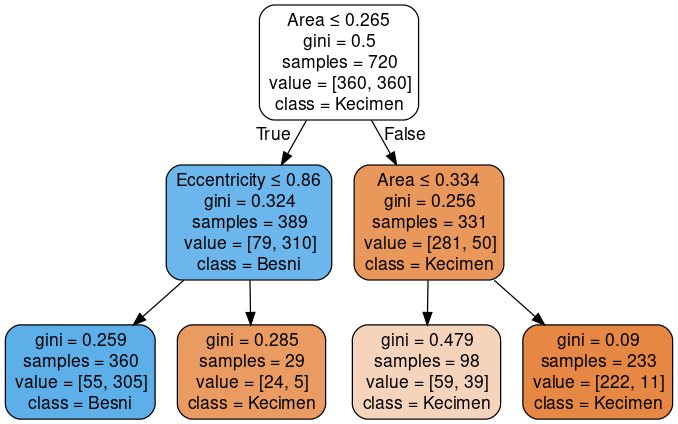

In [34]:
img = Image.open('DT_graph.png')
img

KNN (metric='minkowski', p=2)

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.8166666666666667 , Difference =  18.333333333333336 %
K =  5 , Training Accuracy =  0.8875  Test Accuracy =  0.8333333333333334 , Difference =  5.416666666666659 %
K =  10 , Training Accuracy =  0.8708333333333333  Test Accuracy =  0.8611111111111112 , Difference =  0.9722222222222188 %
K =  15 , Training Accuracy =  0.8638888888888889  Test Accuracy =  0.8444444444444444 , Difference =  1.9444444444444486 %
K =  20 , Training Accuracy =  0.8708333333333333  Test Accuracy =  0.85 , Difference =  2.083333333333337 %
K =  25 , Training Accuracy =  0.8680555555555556  Test Accuracy =  0.8444444444444444 , Difference =  2.361111111111114 %
K =  30 , Training Accuracy =  0.8708333333333333  Test Accuracy =  0.85 , Difference =  2.083333333333337 %


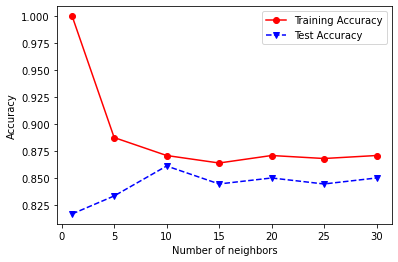

In [51]:
# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2) #euclidean_distance (l2) for p = 2
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

K =  10 , Training Accuracy =  0.8708333333333333  Test Accuracy =  0.8611111111111112 , Difference =  0.9722222222222188 %


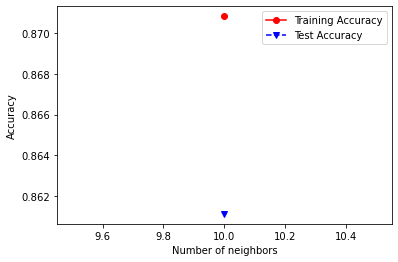

In [52]:
# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
numNeighbors = [10]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

KNN (metric='minkowski', p=1)

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.8444444444444444 , Difference =  15.555555555555555 %
K =  5 , Training Accuracy =  0.8791666666666667  Test Accuracy =  0.8333333333333334 , Difference =  4.583333333333329 %
K =  10 , Training Accuracy =  0.875  Test Accuracy =  0.85 , Difference =  2.500000000000002 %
K =  15 , Training Accuracy =  0.8694444444444445  Test Accuracy =  0.85 , Difference =  1.9444444444444486 %
K =  20 , Training Accuracy =  0.8680555555555556  Test Accuracy =  0.8555555555555555 , Difference =  1.2500000000000067 %
K =  25 , Training Accuracy =  0.8597222222222223  Test Accuracy =  0.8444444444444444 , Difference =  1.5277777777777835 %
K =  30 , Training Accuracy =  0.8625  Test Accuracy =  0.8555555555555555 , Difference =  0.6944444444444531 %


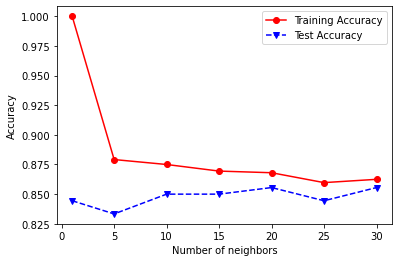

In [36]:
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)#manhattan_distance (l1)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

K =  30 , Training Accuracy =  0.8625  Test Accuracy =  0.8555555555555555 , Difference =  0.6944444444444531 %


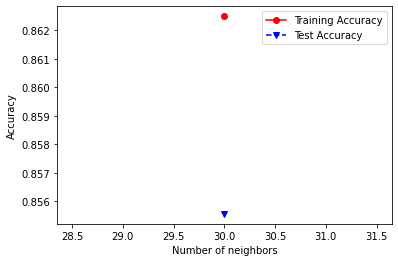

In [87]:
numNeighbors = [30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

Logistic Regression

Logistic Regression with no regularization
Train Accuracy:  0.8652777777777778
Test Accuracy:  0.85
              precision    recall  f1-score   support

       Besni       0.87      0.82      0.85        90
     Kecimen       0.83      0.88      0.85        90

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180



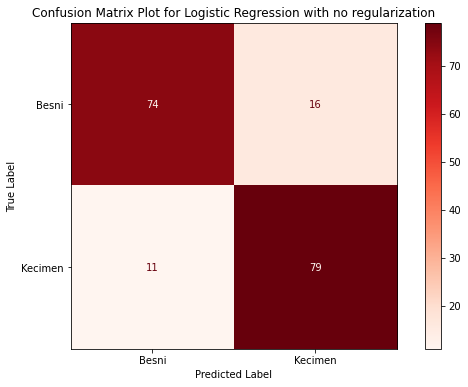


Logistic Regression with L2 regularization
Train Accuracy:  0.8527777777777777
Test Accuracy:  0.8388888888888889
              precision    recall  f1-score   support

       Besni       0.88      0.79      0.83        90
     Kecimen       0.81      0.89      0.85        90

    accuracy                           0.84       180
   macro avg       0.84      0.84      0.84       180
weighted avg       0.84      0.84      0.84       180



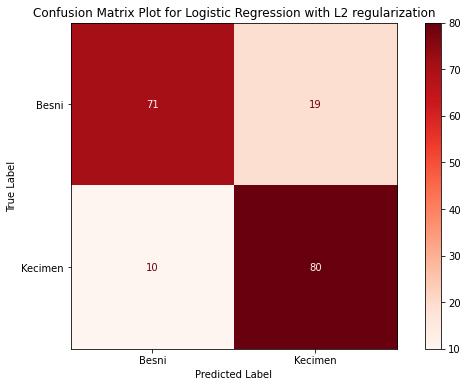

In [48]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty = 'none')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print(classification_report(y_test,y_pred_test))
matrix = plot_confusion_matrix(clf , X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Logistic Regression with no regularization', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()
print()

clf = LogisticRegression(penalty = 'l2')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with L2 regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print(classification_report(y_test,y_pred_test))
matrix = plot_confusion_matrix(clf , X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Logistic Regression with L2 regularization', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

Perceptron Model

Train Accuracy:  0.8666666666666667
Test Accuracy:  0.85
              precision    recall  f1-score   support

       Besni       0.87      0.82      0.85        90
     Kecimen       0.83      0.88      0.85        90

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180



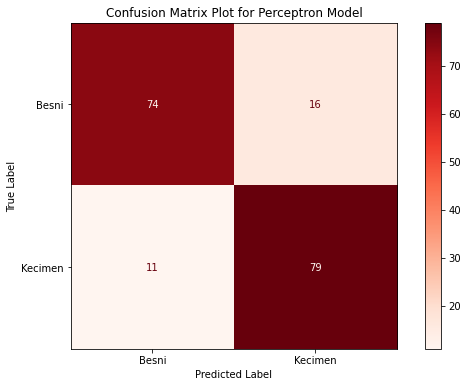

In [45]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print(classification_report(y_test,y_pred_test))
matrix = plot_confusion_matrix(clf , X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Perceptron Model', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

Multinomial Naive Bayes

Train Accuracy:  0.8152777777777778
Test Accuracy:  0.7944444444444444
              precision    recall  f1-score   support

       Besni       0.86      0.70      0.77        90
     Kecimen       0.75      0.89      0.81        90

    accuracy                           0.79       180
   macro avg       0.81      0.79      0.79       180
weighted avg       0.81      0.79      0.79       180



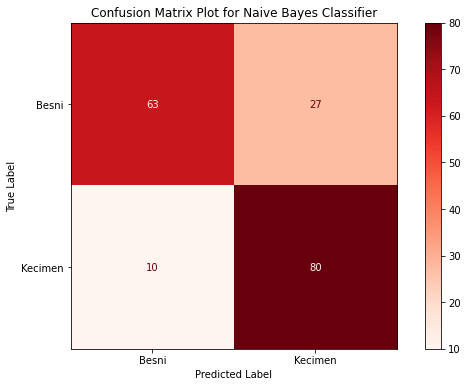

In [44]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print(classification_report(y_test,y_pred_test))
matrix = plot_confusion_matrix(clf , X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Naive Bayes Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

SVC

Train Accuracy:  0.8569444444444444
Test Accuracy:  0.8444444444444444
              precision    recall  f1-score   support

       Besni       0.90      0.78      0.83        90
     Kecimen       0.80      0.91      0.85        90

    accuracy                           0.84       180
   macro avg       0.85      0.84      0.84       180
weighted avg       0.85      0.84      0.84       180



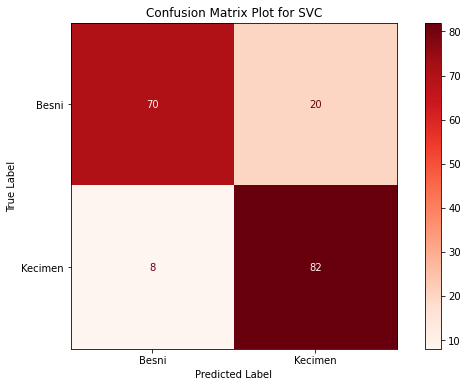

In [49]:
from sklearn.svm import SVC
clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print(classification_report(y_test,y_pred_test))
matrix = plot_confusion_matrix(clf , X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for SVC', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

Decision Tree Model

Train Accuracy:  0.8708333333333333
Test Accuracy:  0.8611111111111112
              precision    recall  f1-score   support

       Besni       0.89      0.82      0.86        90
     Kecimen       0.84      0.90      0.87        90

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



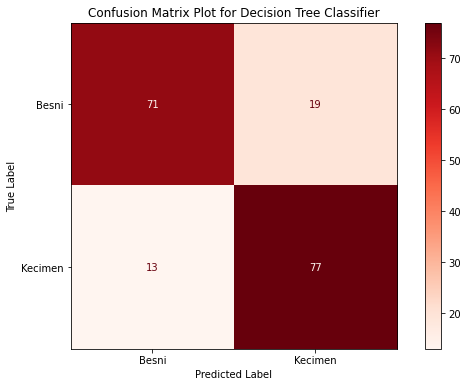

In [54]:
dt = DecisionTreeClassifier(max_depth = 2, random_state=1)
dt.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print(classification_report(y_test,y_pred_test))
matrix = plot_confusion_matrix(dt , X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Decision Tree Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

Random Forest Classifier

Train Accuracy:  1.0
Test Accuracy:  0.8611111111111112
              precision    recall  f1-score   support

       Besni       0.92      0.79      0.85        90
     Kecimen       0.82      0.93      0.87        90

    accuracy                           0.86       180
   macro avg       0.87      0.86      0.86       180
weighted avg       0.87      0.86      0.86       180



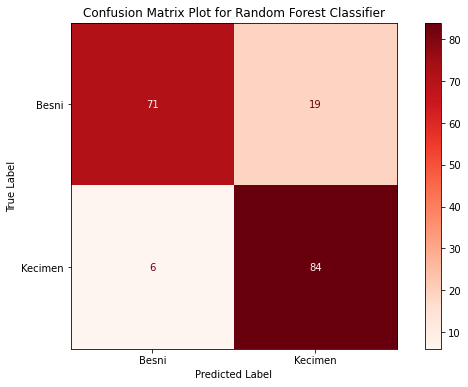

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0).fit(X_train, y_train)
y_pred_train=rf_classifier.predict(X_train)
y_pred_test = rf_classifier.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print(classification_report(y_test,y_pred_test))
matrix = plot_confusion_matrix(rf_classifier , X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Random Forest Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

SGD Classifier

Train Accuracy:  0.8166666666666667
Test Accuracy:  0.8111111111111111
              precision    recall  f1-score   support

       Besni       0.79      0.86      0.82        90
     Kecimen       0.84      0.77      0.80        90

    accuracy                           0.81       180
   macro avg       0.81      0.81      0.81       180
weighted avg       0.81      0.81      0.81       180



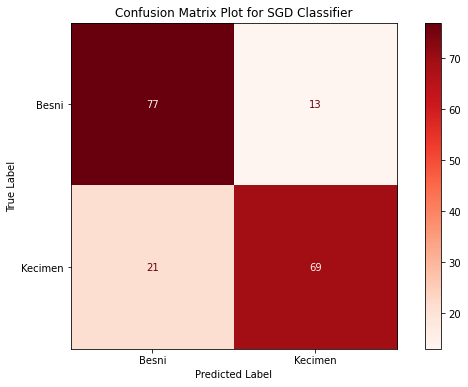

In [64]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(loss = 'log',penalty='l2', max_iter=10,random_state=0)
sgd_classifier.fit(X_train, y_train)
y_pred_train=sgd_classifier.predict(X_train)
y_pred_test = sgd_classifier.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print(classification_report(y_test,y_pred_test))
matrix = plot_confusion_matrix(sgd_classifier , X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for SGD Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

# Hyper-Parameter Optimization

RandomizedSearchCV

In [66]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [67]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model rf=random forest, n_iter = number of iteration
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [68]:
rf_randomcv.best_estimator_

RandomForestClassifier(max_depth=230, min_samples_split=10, n_estimators=400)

In [69]:
best_random_grid=rf_randomcv.best_estimator_

In [80]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[70 20]
 [ 5 85]]
Accuracy Score 0.8611111111111112
Classification report:               precision    recall  f1-score   support

       Besni       0.93      0.78      0.85        90
     Kecimen       0.81      0.94      0.87        90

    accuracy                           0.86       180
   macro avg       0.87      0.86      0.86       180
weighted avg       0.87      0.86      0.86       180



GridSearch CV

In [72]:
rf_randomcv.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 230,
 'criterion': 'gini'}

In [73]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [230], 'max_features': ['auto'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [8, 9, 10, 11, 12], 'n_estimators': [200, 300, 400, 500, 600]}


In [74]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [230],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [8, 9, 10, 11, 12],
                         'n_estimators': [200, 300, 400, 500, 600]},
             verbose=2)

In [75]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=230, min_samples_split=8, n_estimators=200)

In [76]:
best_grid=grid_search.best_estimator_

In [77]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 230,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 200}

In [78]:
best_grid

RandomForestClassifier(max_depth=230, min_samples_split=8, n_estimators=200)

In [79]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))


[[72 18]
 [ 5 85]]
Accuracy Score 0.8722222222222222
Classification report:               precision    recall  f1-score   support

       Besni       0.94      0.80      0.86        90
     Kecimen       0.83      0.94      0.88        90

    accuracy                           0.87       180
   macro avg       0.88      0.87      0.87       180
weighted avg       0.88      0.87      0.87       180



# Cross-Validation Technique

Shuffle Split/ Repeated Random train-test splits

In [111]:
from sklearn.model_selection import ShuffleSplit
ssplit = ShuffleSplit(n_splits = 10, test_size = 0.30)
clf = DecisionTreeClassifier()
results = cross_val_score(clf, X, y, cv = ssplit)
print(results)
print()
print ("Results = ", np.mean(results), "+/-", np.std(results))

[0.8        0.78888889 0.82592593 0.8        0.82962963 0.81111111
 0.82592593 0.83333333 0.82592593 0.8       ]

Results =  0.8140740740740743 +/- 0.015071844406945041


# The End